## Observations and Insights 
1: When analyzing the data from the boxplot, out of the four treatment regimens we were tasked to specifically analyze, Ramicane seems to be the most effective in addressing the size of the tumors. Even though the IQR is larger than Capomulin, the largest tumor size after undergoing Ramicane treatment is still smaller than the largest tumor size after the mouse underwent Capomulin treatment, which seems to be the second most effective drug. The smallest tumor size after Ramicane treatment is also smaller than the smallest tumor size after the mouse was treated with Capomulin. This analysis is backed up by the mean tumor sizes for each drug regimen where Ramicane’s mean size was 40.22mm^3, while Capomulin’s mean tumor size was 40.67mm^3.

2: The least consistent drug regimen for treating tumor size is Ketapril. The standard deviation of tumor sizes in mm^3 in mice treated with Ketapril is 8.13, and the standard error of the mean of tumor sizes is .60. The mean tumor size at the final timepoint is also the highest of any regimen at 55.24; even the placebo group’s mean tumor size is 54.03. Based on that information, Ketapril could possibly be worse for treating tumors in mice than no drug regimen at all.

3: In a mouse, r944, treated with Capomulin there is a fairly clear efficacy rate over the course of the 45 days. The size of r944’s tumor peaked at around 15 days at roughly 47.5mm^3, then the size of the tumor sharply decreases to roughly 41mm^3 at day 25, then increases to just under 42mm^3 by then end of the experiment at day 45. Considering the starting tumor size at roughly 45mm^3, a decrease of 3mm^3 over the course of 45 days is a 6.67% loss in tumor size.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from matplotlib.pyplot import subplots
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_study=pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')
# Display the data table for preview
# print(study_results.head())
# print(mouse_metadata.head())
print(complete_study)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [2]:
# Checking the number of mice.
len(complete_study['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = complete_study.loc[complete_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(dups)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_study.loc[complete_study.loc[:, 'Mouse ID']=="g989", :]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_df = complete_study.loc[:, 'Mouse ID'].isin(dups)==False
clean_study=complete_study.loc[filter_df]
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study['Mouse ID'].unique())

248

In [7]:
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# stats_dict = 
summary_statistics = pd.DataFrame({"Mean Tumor Size": mean, 
                                   "Median Tumor Size": median, 
                                   "Variance of Tumor Size": var, 
                                   "Standard Deviation of Tumor Size": std, 
                                   "Standard Error of Mean for Tumor Sizes": sem})
summary_statistics


,Mean Tumor Size,Median Tumor Size,Variance of Tumor Size,Standard Deviation of Tumor Size,Standard Error of Mean for Tumor Sizes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'var' , 'sem']})
# summary_stats.columns=['mean',"Mean Tumor Size","var", "Variance of Tumor Size"]
# summary_stats.rename(columns={"median" : "Median Tumor Size"})
# summary_stats.rename(columns={"var" : "Variance of Tumor Size"})
# summary_stats.rename(columns={"std" : "Standard Deviation of Tumor Size"})
# summary_stats.rename(columns={"sem" : "Standard Error of Mean for Tumor Sizes"})

summary_stats
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

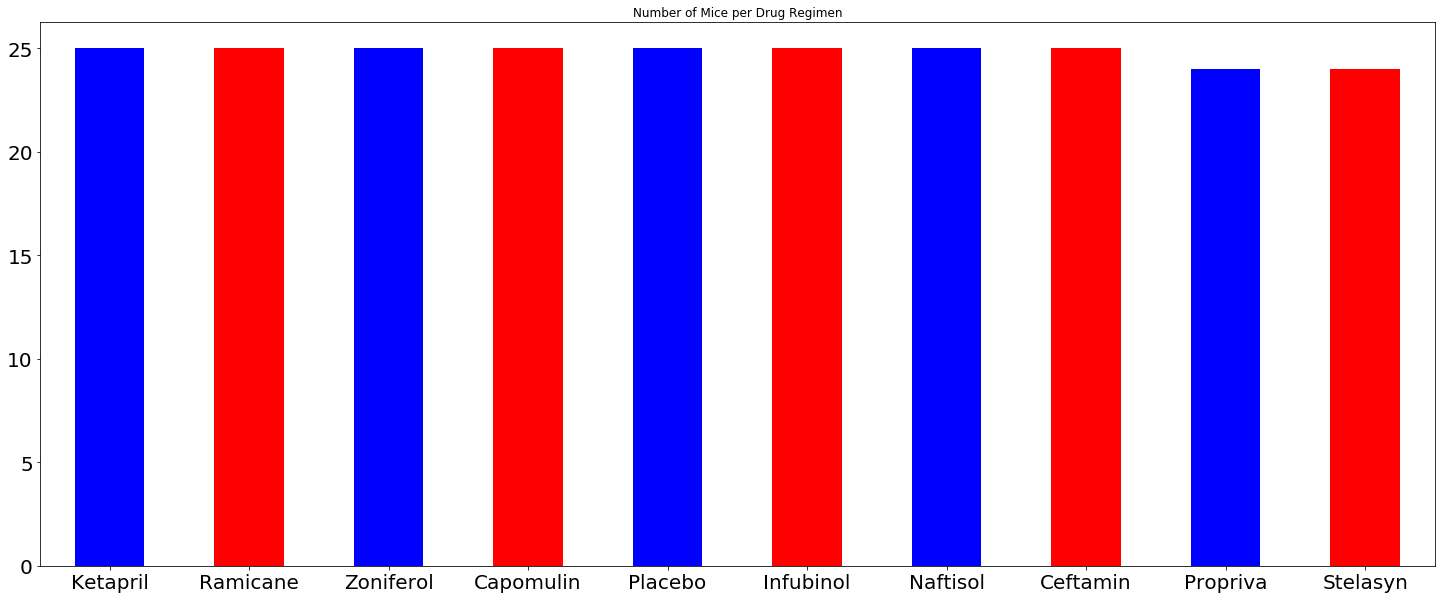

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#plot graph, change figsize, add title, change fontsizes
counts=clean_study.loc[:, ['Mouse ID','Drug Regimen']].drop_duplicates()['Drug Regimen'].value_counts()
counts.plot(kind='bar', figsize = (25,10), title = "Number of Mice per Drug Regimen", rot = 0, fontsize=20, color = ['b','r'])


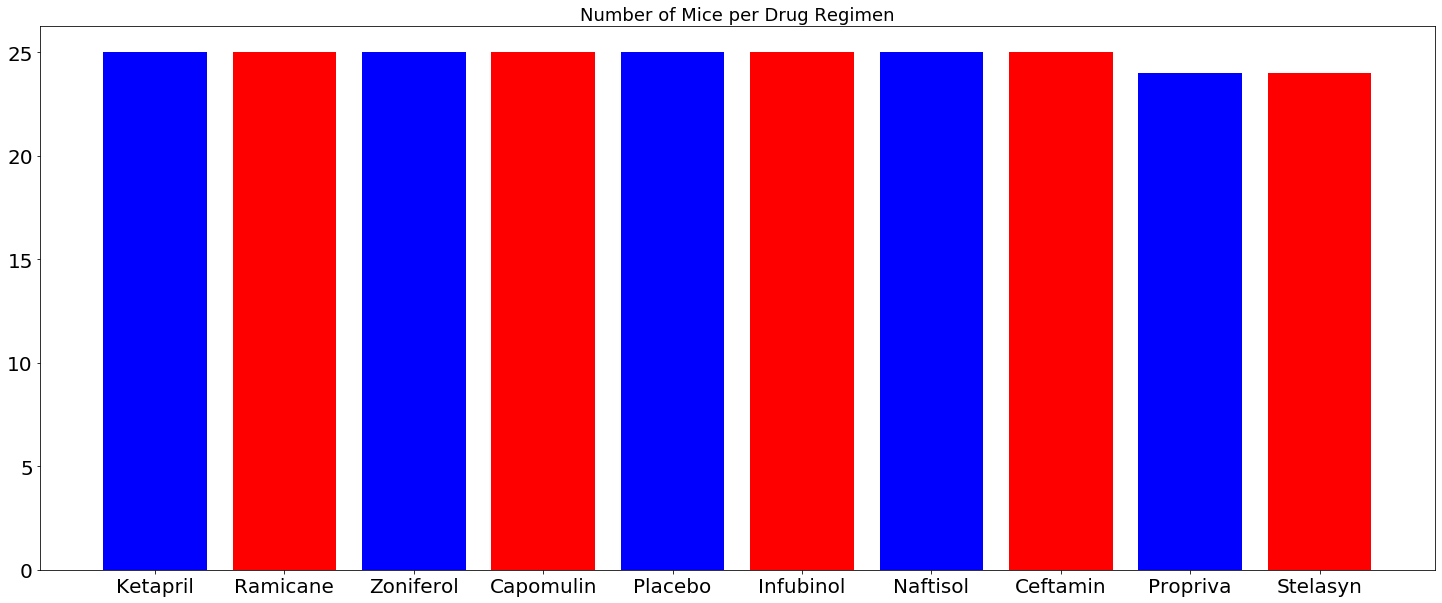

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#adjust figure size, font size, add title, show plot
plt.figure(figsize=(25,10))


mouse_drugs_graph = plt.bar(counts.index, counts, color=['b', 'r'], )


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#set chart title

plt.title("Number of Mice per Drug Regimen", fontsize=18)
# plt.xlabel("Drug Regimen", fontsize=18)
# plt.ylabel("Number of Mice", fontsize=18)

#show chart and set layout
plt.show()
# mouse_count_data

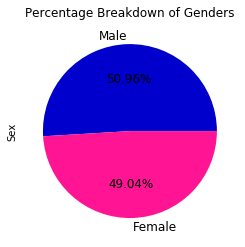

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = clean_study['Sex'].value_counts()
gender_counts.plot(kind='pie', title="Percentage Breakdown of Genders", rot = 0, fontsize=12, autopct = '%1.2f%%', colors = ['#0000CD', '#FF1493'])

Text(0.5, 0, 'Female')

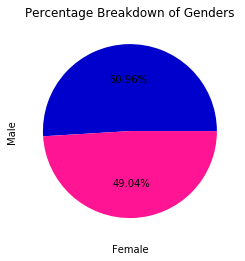

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts_plt = clean_study['Sex'].value_counts()
plt.pie(gender_counts_plt, autopct='%1.2f%%', colors =['#0000CD', '#FF1493'] )
plt.title("Percentage Breakdown of Genders")
plt.ylabel("Male")
plt.xlabel("Female")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time=clean_study.groupby('Mouse ID').max()['Timepoint']
# max_time = max_time.to_frame
# max_time = pd.DataFrame(clean_study.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)'])
max_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_study = pd.merge(max_time, clean_study, on=['Mouse ID', 'Timepoint'], how='left')
max_time_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_volume_list = []

# Create empty list to fill with tumor vol data (for plotting)
for each_drug in regimens:
    filter_df=max_time_study.loc[:, 'Drug Regimen']==each_drug
    four_quantiles=[.25, .5, .75]
    one_drug_tumor_volume=max_time_study.loc[filter_df, 'Tumor Volume (mm3)']

    tumor_volume_list.append(max_time_study.loc[filter_df, 'Tumor Volume (mm3)'])
    quartiles=one_drug_tumor_volume.quantile(four_quantiles)
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = (upperq-lowerq)
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    filter_volume = (one_drug_tumor_volume>upper_bound) | (one_drug_tumor_volume<lower_bound)
    # max_time_study.loc[filter_df, 'Tumor Volume (mm3)']>upper_bound | max_time_study.loc[filter_df, 'Tumor Volume (mm3)']<lower_bound
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    outlier_count=len(one_drug_tumor_volume.loc[filter_volume])
    print(f"There are {outlier_count} outliers for {each_drug}")
        # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


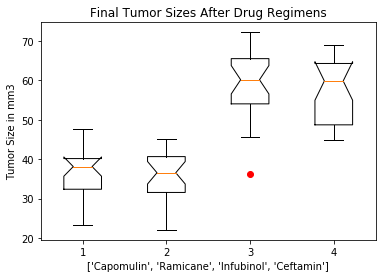

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, notch=True, sym='r')
plt.title("Final Tumor Sizes After Drug Regimens")
plt.ylabel("Tumor Size in mm3")
plt.xlabel(regimens)
box_colors=['darkkhaki' 'royalblue']
# plt.xticks('Capomulin', 'Ramicane', 'Infubinol','Ceftamin')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Size (mm3)')

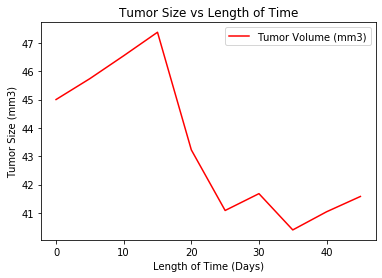

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
filter_df=clean_study.loc[:, 'Drug Regimen']=='Capomulin'
capomulin=clean_study.loc[filter_df, :]

filter_df=capomulin.loc[:, 'Mouse ID']=='r944'
one_mouse=capomulin.loc[filter_df, :]
one_mouse.plot('Timepoint', 'Tumor Volume (mm3)', color='r')

# plt.xticks(.5)
plt.title('Tumor Size vs Length of Time')
plt.xlabel('Length of Time (Days)')
plt.ylabel('Tumor Size (mm3)')


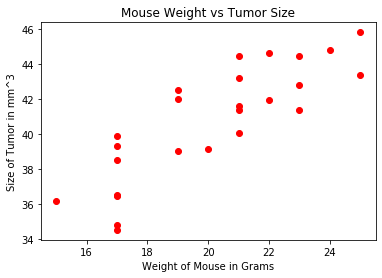

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg=capomulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='r')
plt.xlabel("Weight of Mouse in Grams")
plt.ylabel("Size of Tumor in mm^3")
plt.title("Mouse Weight vs Tumor Size")
plt.show()

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(sts.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0], 2)
print(f"The Correlation is {correlation}")

The Correlation is 0.84


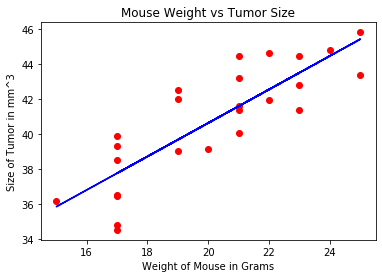

In [58]:
m, b, r, p, std=sts.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
y_pred=m*capomulin_avg['Weight (g)']+b
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'], color='r')
plt.plot(capomulin_avg['Weight (g)'], y_pred, color='blue')
plt.xlabel("Weight of Mouse in Grams")
plt.ylabel("Size of Tumor in mm^3")
plt.title("Mouse Weight vs Tumor Size")

plt.annotate
plt.show()
